In [2]:
import numpy as np 
import pandas as pd 

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

Using TensorFlow backend.
/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [1]:
print ('following code is to test whether multiple currency data may help improving accuracy')
print('*'*60)
print('It turns out 500neuron + 50 epochs + price,volume,volume quote gives best result')

following code is to test whether multiple currency data may help improving accuracy
************************************************************
It turns out 500neuron + 50 epochs + price,volume,volume quote gives best result


In [61]:
pdf = pd.read_csv('poloniex_usdt_pairs.csv')
new_df = pd.DataFrame(pdf[1:])
new_df = new_df.set_index('Unnamed: 0').apply(lambda x: pd.Series([float(i) for i in x]))
#BCH data set has too many NAN value, so I discard it
df1=new_df.drop({'USDT_BCH','USDT_BCH.1','USDT_BCH.2'},axis=1)
#discard the NAN value in last 3 rows
df1=df1[:-3]
#df1.isnull().sum()
x_set=df1.iloc[:,0:3]
y_set=df1.iloc[1:,2:3]
y_set=y_set.apply(lambda x: pd.Series([float(i) for i in x]))



/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [62]:
x_set.shape

(125388, 3)

In [63]:
def main_training (x,y,train_end,data_to_use, n_neuron,n_epoch):
   
    x_train=np.array(x[0:train_end])
    y_train=np.array(y[0:train_end])
    x_test=np.array(x[train_end:data_to_use])
    y_test=np.array(y[train_end:data_to_use])

    print(x_train.shape,x_test.shape)
    print(y_train.shape,y_test.shape)
    x_train=np.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))
    x_test=np.reshape(x_test,(x_test.shape[0],1,x_test.shape[1]))
    
    mod1 = Sequential ()
    mod1.add (LSTM (n_neuron, activation = 'tanh', inner_activation = 'hard_sigmoid' , input_shape =(1,3),return_sequences=False))
    mod1.add(Dropout(0.2))
    #mod1.add (LSTM (500, activation = 'tanh', inner_activation = 'hard_sigmoid' ,return_sequences=True))
    #mod1.add(Dropout(0.2))
    #mod1.add (LSTM (250, activation = 'tanh', inner_activation = 'hard_sigmoid' , return_sequences=True ))
    #mod1.add(Dropout(0.2))
    #mod1.add (LSTM (200, activation = 'tanh', inner_activation = 'hard_sigmoid' , return_sequences=True ))
    #mod1.add(Dropout(0.2))
    #mod1.add (LSTM (100, activation = 'tanh', inner_activation = 'hard_sigmoid' , return_sequences=True ))
    #mod1.add(Dropout(0.2))
    #mod1.add (LSTM (50, activation = 'tanh', inner_activation = 'hard_sigmoid' , return_sequences=True ))
    #mod1.add(Dropout(0.2))
    #mod1.add (LSTM (25, activation = 'tanh', inner_activation = 'hard_sigmoid' , return_sequences=True ))
    #mod1.add(Dropout(0.2))
    #mod1.add (LSTM (12, activation = 'tanh', inner_activation = 'hard_sigmoid' , return_sequences=True ))
    #mod1.add(Dropout(0.2))
    #mod1.add (LSTM (6, activation = 'tanh', inner_activation = 'hard_sigmoid' , return_sequences=True ))
    #mod1.add(Dropout(0.2))
    #mod1.add (LSTM (4, activation = 'tanh', inner_activation = 'hard_sigmoid' , return_sequences=True ))
    #mod1.add(Dropout(0.2))
    #mod1.add (LSTM (2, activation = 'tanh', inner_activation = 'hard_sigmoid' , return_sequences=False ))
    #mod1.add(Dropout(0.2))
    
    mod1.add (Dense (output_dim =1, activation = 'linear'))
 
    mod1.compile (loss ="mae" , optimizer = "adam")   
    mod1.fit (x_train, y_train, batch_size =int(len(x_train)/n_epoch), nb_epoch =n_epoch, shuffle = False)
    
    trainpredict=mod1.predict(x_train)
    testpredict=mod1.predict(x_test)
    
    
    return (trainpredict, testpredict,y_train,y_test)

In [64]:
def mean_error_dollar (trainpredict,testpredict,y_train,y_test,change_factor=None):
    #mean_error_square=sum((y_test-testpredict)**2)/len(y_test)
    print(np.append(np.array(trainpredict),np.array(testpredict)))
    predict=scaler_y.inverse_transform((np.append(np.array(trainpredict),np.array(testpredict))).reshape(-1,1))
    y=scaler_y.inverse_transform((np.append(np.array(y_train),(np.array(y_test)))).reshape(-1,1))
    #trainpredict=scaler_x.inverse_transform(np.array(trainpredict))
    y_train=y[:train_end]
    y_test=y[train_end:]
    trainpredict=predict[:train_end]
    testpredict=predict[train_end:]
    
    #plot training set and testing set prediction vs real data
    plt.figure()
    plt.plot(y_train,color='blue',linewidth=0.4,label='Real')
    plt.plot(trainpredict, color='red',linewidth=0.4,label='Predict')
    #plt.figure()
    #plt.plot(trainpredict, color='red')
    plt.title('training set'+change_factor)
    plt.xlabel('Time Points',fontsize=14)
    plt.ylabel('US Dollars',fontsize=14)
    
    plt.figure()
    plt.plot(y_test,color='blue',linewidth=0.4)
    plt.plot(testpredict, color='red',linewidth=0.4)
    #plt.figure()
    #plt.plot(testpredict, color='red')
    plt.title('test set'+change_factor)
    plt.xlabel('Time Points',fontsize=14)
    plt.ylabel('US Dollars',fontsize=14)
    
    plt.figure()
    plt.plot(y_test[24800:],color='blue',linewidth=0.4)
    plt.plot(testpredict[24800:], color='red',linewidth=0.4)
    #plt.figure()
    #plt.plot(testpredict, color='red')
    plt.title('test set'+change_factor)
    plt.xlabel('Time Points',fontsize=14)
    plt.ylabel('US Dollars',fontsize=14)
    mean_error_test=sum(abs(y_test-testpredict))/len(y_test)
    mean_error_train=sum(abs(y_train-trainpredict))/len(y_train)
    return (mean_error_test,mean_error_train)


(100304, 3) (25076, 3)
(100304, 1) (25076, 1)


/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(1000, activation="tanh", input_shape=(1, 3), return_sequences=False, recurrent_activation="hard_sigmoid")`
  
/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/50
100304/100304 [==============================] - 91s 910us/step - loss: 0.0301
Epoch 2/50
100304/100304 [==============================] - 101s 1ms/step - loss: 0.1257
Epoch 3/50
100304/100304 [==============================] - 80s 800us/step - loss: 0.0714
Epoch 4/50
100304/100304 [==============================] - 78s 774us/step - loss: 0.0044
Epoch 5/50
100304/100304 [==============================] - 77s 766us/step - loss: 0.0083
Epoch 6/50
100304/100304 [==============================] - 77s 764us/step - loss: 0.0122
Epoch 7/50
100304/100304 [==============================] - 71s 705us/step - loss: 0.0159
Epoch 8/50
100304/100304 [==============================] - 70s 697us/step - loss: 0.0073
Epoch 9/50
100304/100304 [==============================] - 71s 712us/step - loss: 0.0121
Epoch 10/50
100304/100304 [==============================] - 70s 699us/step - loss: 0.0046
Epoch 11/50
100304/100304 [==============================] - 80s 795us/step - loss: 0.0032
Epoch 12/

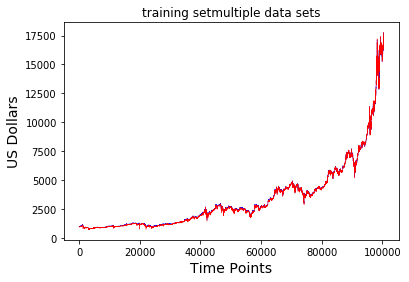

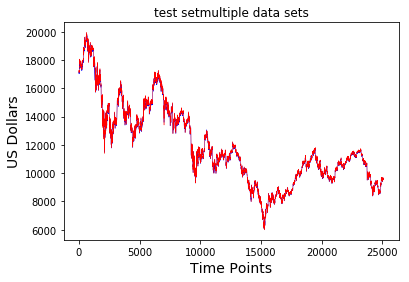

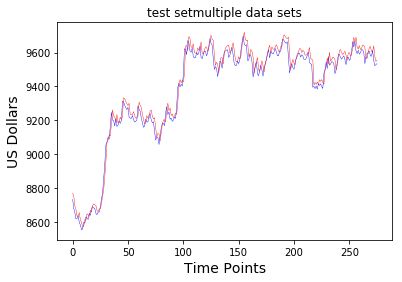

In [65]:
#normalization
scaler_x=MinMaxScaler(feature_range=(0,1))
x=scaler_x.fit_transform(x_set)
scaler_y=MinMaxScaler(feature_range=(0,1))
y=scaler_y.fit_transform(y_set)


data_to_use=125380
train_end=int(data_to_use*0.8)
total_data=len(df1)
#start=total_data-data_to_use
#n_neurons=[1,5,10,50,100,200]
n_neuron=500
n_epoch=50

mean_error_test_l=list([])
mean_error_train_l=list([])

trainpredict,testpredict,y_train,y_test=main_training(x,y,train_end,data_to_use, n_neuron,n_epoch)
mean_error_test,mean_error_train=mean_error_dollar(trainpredict,testpredict,y_train,y_test,
                                                   change_factor='{}'.format('multiple data sets'))
mean_error_test_l.append(mean_error_test)
mean_error_train_l.append(mean_error_train)